### Test code to read HDF file from JASMINE master catalogue server.

In [1]:
import pandas as pd

catdata = pd.read_hdf("cat_jhk_hw_145.hdf") 
print(catdata)

               ra        dec  phot_j_mag  phot_h_mag  phot_ks_mag      glon  \
0       266.38742 -31.262941      14.750      13.201       12.373 -1.994114   
1       266.38370 -31.266315      14.785      13.096       12.378 -1.998646   
2       266.38470 -31.264654      14.261      12.403       11.737 -1.996775   
3       266.37997 -31.264746      13.633      11.619       10.839 -1.998965   
4       266.37980 -31.263390      14.272      12.265       11.389 -1.997890   
...           ...        ...         ...         ...          ...       ...   
632003  265.95114 -27.294586      14.399      13.347       13.012  1.190509   
632004  265.95260 -27.291252      12.852      11.598       10.945  1.194036   
632005  265.95792 -27.290485      14.485      13.315       12.806  1.197159   
632006  265.95874 -27.288437      14.276      13.072       12.531  1.199286   
632007  265.95758 -27.287289      13.356      12.093       11.569  1.199732   

            glat  
0      -1.199238  
1      -1.198

In [2]:
import numpy as np
jmag = catdata['phot_j_mag'].values
hmag = catdata['phot_h_mag'].values
glon = catdata['glon'].values
glat = catdata['glat'].values
hwmag = 0.9*jmag+0.1*hmag-0.06*(np.power(jmag-hmag,2))

(-3.6429000000000005, 6.496900000000002)

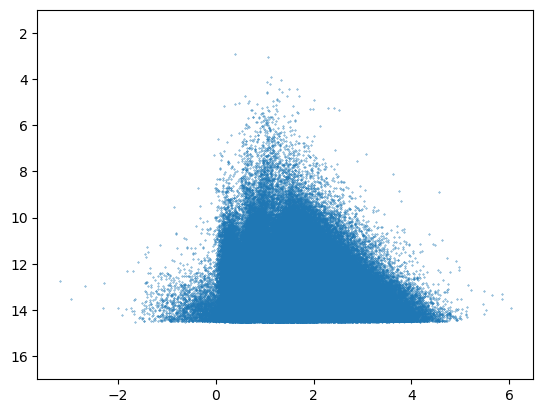

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.scatter(jmag-hmag, hwmag, s=0.1)
plt.ylim(17.0,1.0)
plt.xlim()

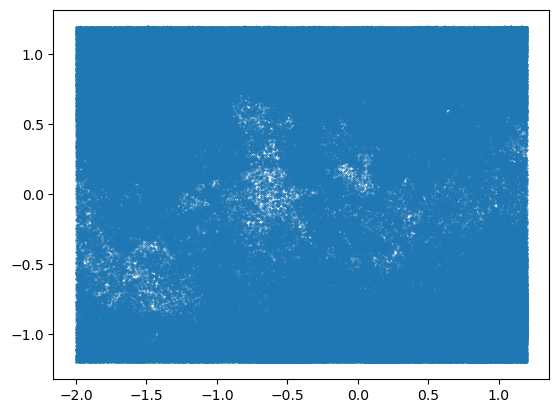

In [4]:
plt.scatter(catdata['glon'], catdata['glat'], s=0.1)

### JASMINE Galactic centre field

JASMINE Field-of-View

In [5]:
# effective Focal length (mm)
EFL_mm=4370.0
# size of each chip
each_width_mm=19.52
# size between each chip
width_mm=22.4
# width of focal plane
fp_width_mm = each_width_mm+width_mm
print(' size of focal plane (mm)= ', fp_width_mm)
# size of field of view degree
fov_deg2 = (fp_width_mm/EFL_mm)*180.0/np.pi
print(' size of FoV (deg)=', fov_deg2)

 size of focal plane (mm)=  41.92
 size of FoV (deg)= 0.5496199261300712


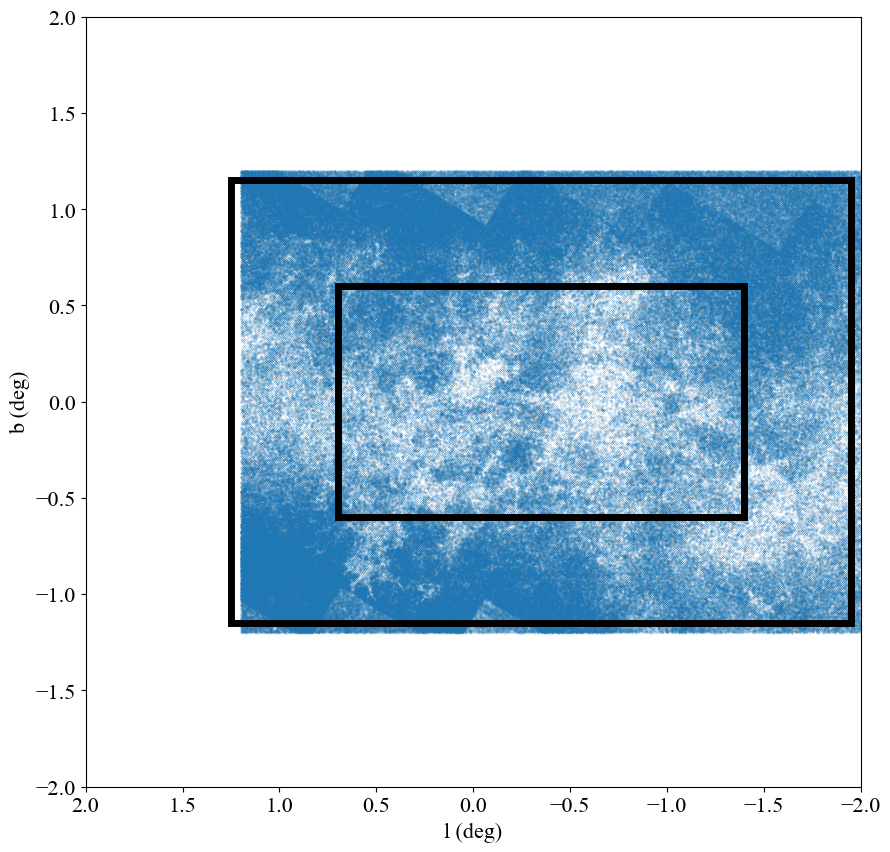

In [6]:
# size of JASMINE field
glon_high = 0.7
glon_low = -1.4
glat_high = 0.6
glat_low = -0.6
from matplotlib import patches
plt.figure(figsize=(10, 10))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "stixsans"
plt.rcParams["font.size"] = 16
ax  = plt.gca()
# ax.tick_params(labelsize=16, color='k', direction="in")
ax.set_xlim(2.0, -2.0)
ax.set_ylim(-2.0, 2.0)
ax.set_xlabel('l (deg)')
ax.set_ylabel('b (deg)')
# stars
plt.scatter(glon, glat, s=0.01)
# JASMINE science region
ax.add_patch(patches.Rectangle((glon_low, glat_low), glon_high-glon_low, glat_high-glat_low, lw=5, fc='black', fill = None))
ax.add_patch(patches.Rectangle((glon_low-fov_deg2, glat_low-fov_deg2), glon_high-glon_low+2*fov_deg2, \
                               glat_high-glat_low+2*fov_deg2, lw=5, fc='cyan', fill = None))



Counting number of stars within the JGCS regions.

In [7]:
sindx = np.where((glon>glon_low) & (glon<glon_high) & (glat>glat_low) & (glat<glat_high))
print('number of stars in JGCS =', len(glon[sindx]))
sindx125 = np.where((glon>glon_low) & (glon<glon_high) & (glat>glat_low) & (glat<glat_high) & (hwmag<12.5))
print('number of stars with Hw<12.5 in JGCS =', len(glon[sindx125]))

number of stars in JGCS = 122799
number of stars with Hw<12.5 in JGCS = 14885


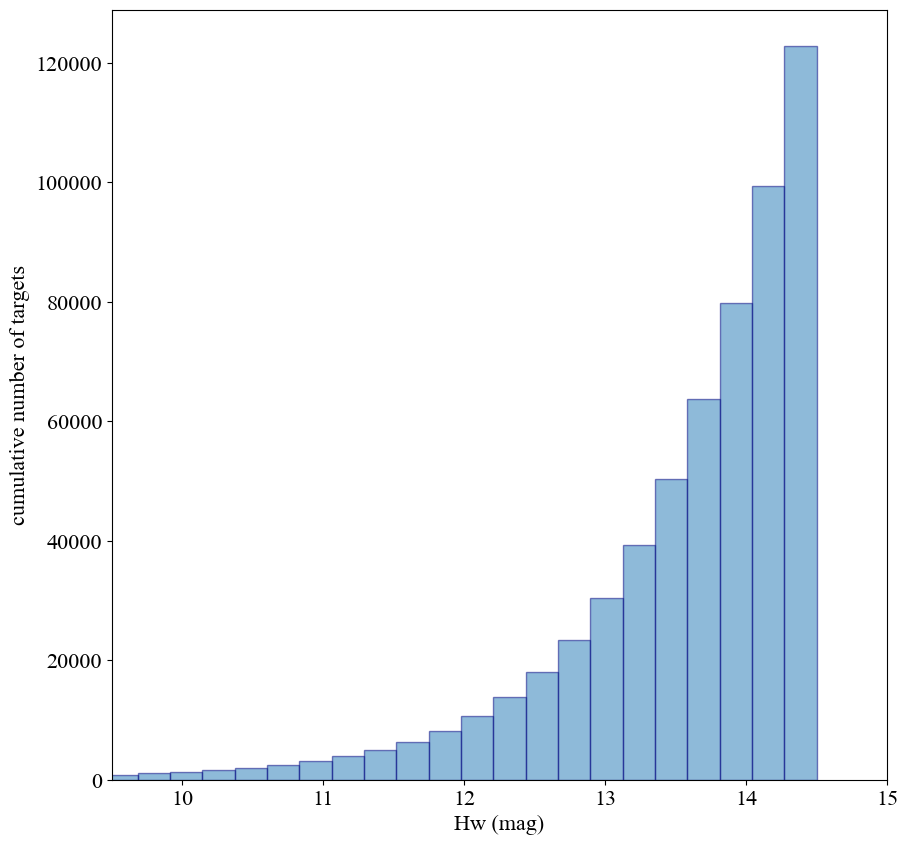

In [19]:
plt.figure(figsize=(10, 10))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "stixsans"
plt.rcParams["font.size"] = 16
ax  = plt.gca()
cb=ax.hist(hwmag[sindx], alpha=0.5, bins=50, ec='navy', cumulative=True)
ax.set_ylabel("cumulative number of targets")
ax.set_xlabel("Hw (mag)")
ax.set_xlim(9.5, 15.0)
plt.show()

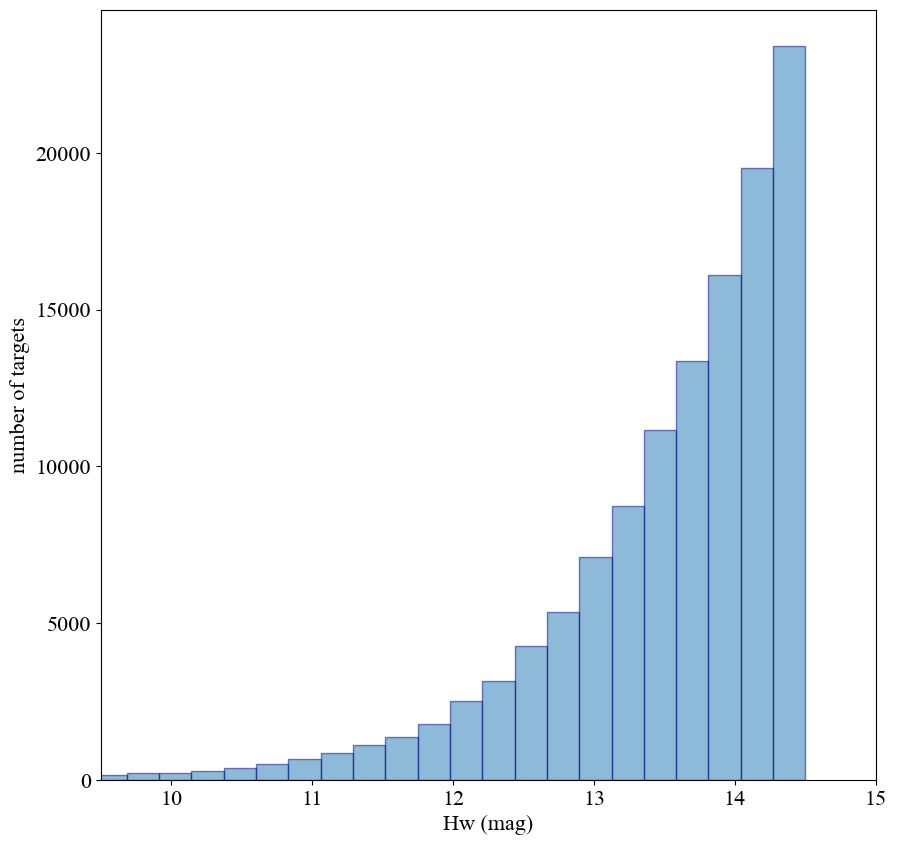

In [20]:
plt.figure(figsize=(10, 10))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "stixsans"
plt.rcParams["font.size"] = 16
ax  = plt.gca()
cb=ax.hist(hwmag[sindx], alpha=0.5, bins=50, ec='navy', cumulative=False)
ax.set_ylabel("number of targets")
ax.set_xlabel("Hw (mag)")
ax.set_xlim(9.5, 15.0)
plt.show()

(-0.5, 4.0)

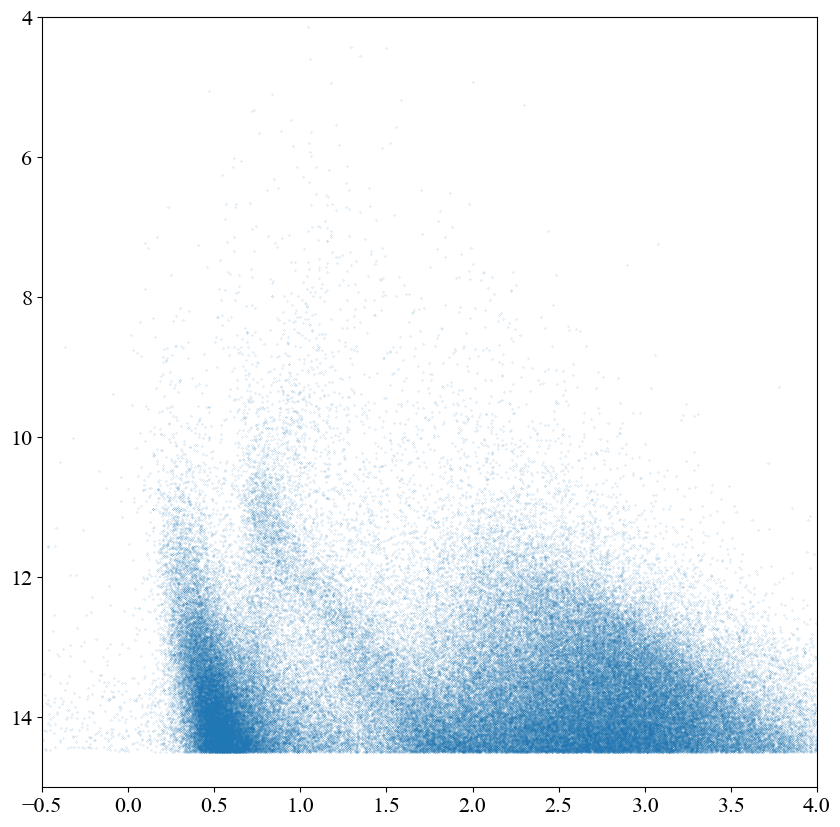

In [13]:
plt.figure(figsize=(10, 10))
plt.scatter(jmag[sindx]-hmag[sindx], hwmag[sindx], s=0.01)
plt.ylim(15.0,4.0)
plt.xlim(-0.5,4.0)

Galactice centre ($J-H>2.0$) stars

In [14]:
sindx_gc = np.where((glon>glon_low) & (glon<glon_high) & (glat>glat_low) & (glat<glat_high) & (jmag-hmag>2.0))
print('number of stars in JGCS =', len(glon[sindx_gc]))
sindx125_gc = np.where((glon>glon_low) & (glon<glon_high) & (glat>glat_low) & (glat<glat_high) & (hwmag<12.5) & (jmag-hmag>2.0))
print('number of stars with Hw<12.5 in JGCS =', len(glon[sindx125_gc]))

number of stars in JGCS = 68365
number of stars with Hw<12.5 in JGCS = 6015


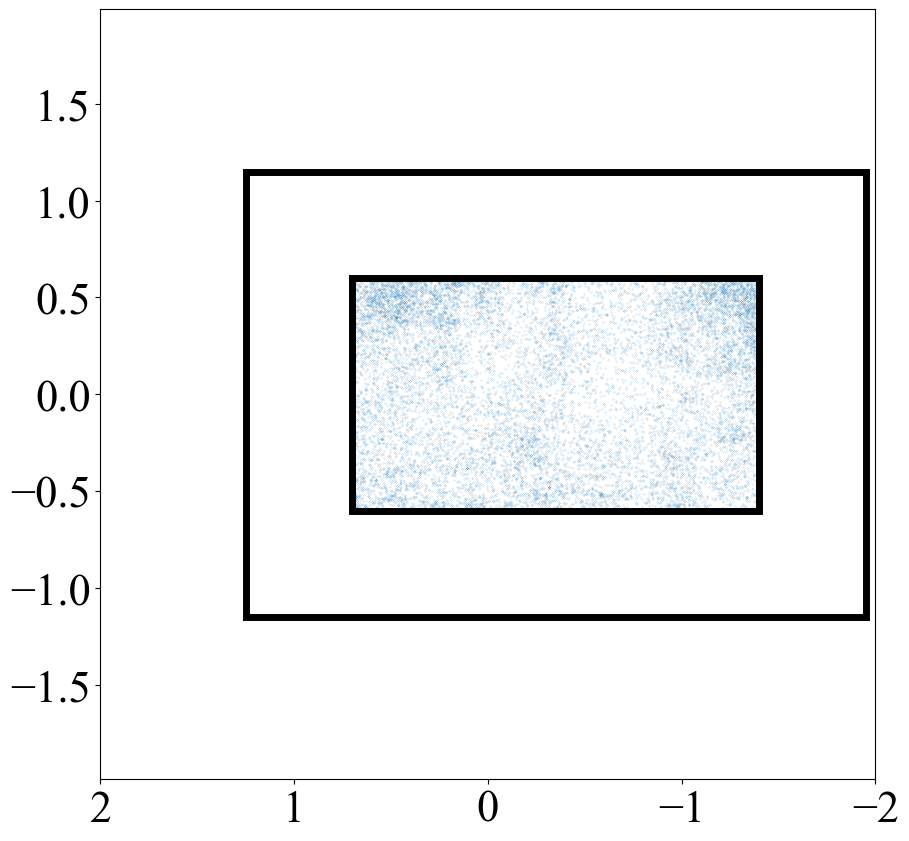

In [17]:
plt.figure(figsize=(10, 10))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "stixsans"
plt.rcParams["font.size"] = 32
ax  = plt.gca()
ax.axis('equal')
# ax.tick_params(labelsize=16, color='k', direction="in")
ax.set_xlim(2.0, -2.0)
ax.set_ylim(-1.5, 1.5)
plt.scatter(glon[sindx125], glat[sindx125], s=0.01)
# JASMINE science region
ax.add_patch(patches.Rectangle((glon_low, glat_low), glon_high-glon_low, glat_high-glat_low, lw=5, fc='black', fill = None))
ax.add_patch(patches.Rectangle((glon_low-fov_deg2, glat_low-fov_deg2), glon_high-glon_low+2*fov_deg2, \
                               glat_high-glat_low+2*fov_deg2, lw=5, fc='cyan', fill = None))

including the surronding area

In [18]:
sindx_s = np.where((glon>glon_low-fov_deg2) & (glon<glon_high+fov_deg2) & (glat>glat_low-fov_deg2) & (glat<glat_high+fov_deg2))
print('number of stars in JGCS =', len(glon[sindx_s]))
sindx125_s = np.where((glon>glon_low-fov_deg2) & (glon<glon_high+fov_deg2) & (glat>glat_low-fov_deg2) & (glat<glat_high+fov_deg2) & (hwmag<12.5))
print('number of stars with Hw<12.5 in JGCS =', len(glon[sindx125_s]))

number of stars in JGCS = 589122
number of stars with Hw<12.5 in JGCS = 102831
